<a href="https://colab.research.google.com/github/danilojha/ML-Projects/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

# Loading data
#data = np.load('data2D.npy')
data = np.load('data100D.npy')
[num_pts, dim] = np.shape(data)
#num_pts = 10000, dim = 2

#added by me
is_valid = False

# For Validation set
if is_valid:
  valid_batch = int(num_pts / 3.0)
  np.random.seed(45689)
  rnd_idx = np.arange(num_pts)
  np.random.shuffle(rnd_idx)
  val_data = data[rnd_idx[:valid_batch]]
  data = data[rnd_idx[valid_batch:]]

In [0]:
# Distance function for K-means
def distanceFunc(X, MU):
  # Inputs
  # X: is an NxD matrix (N observations and D dimensions)
  # MU: is an KxD matrix (K means and D dimensions)
  # Outputs
  # pair_dist: is the pairwise distance matrix (NxK)
  # pair_dist is the distances of the data from the cluster centers
  X_expanded = tf.expand_dims(X, 1)   #to help summing along axis
  pair_dist = tf.reduce_sum(tf.square(tf.cast(X_expanded, tf.float64)-tf.cast(MU, tf.float64)), 2)
  return pair_dist

def build_graph(K, dim, nmpts):
  #initializing variables
  x = tf.placeholder(tf.float64, shape=(None,dim), name='x') 
  mu = tf.Variable(tf.random_normal([K, dim]), tf.float64)  
  
  #finding the closest cluster
  distances = distanceFunc(x, mu) #NxK
  min_distance = tf.reduce_min(distances, 1) #Nx1
  cluster_alloc = tf.arg_min(distances, 1)
  
  #loss
  Loss = tf.reduce_sum(min_distance)                   
  Opt = tf.train.AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(Loss)
  return x, mu, Loss, Opt, cluster_alloc
  
def SGD(data, K, N, dimension, valid_data):
  #initializing
  x, mu, loss, optimizer, cluster = build_graph(K, dimension, N)
  loss_values = []
  validation_losses = []
  updates = []
  epochs = 500
  
  #training
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
      _, loss_iter, cl_alloc = sess.run([optimizer, loss, cluster], feed_dict={x:data})
      validation_loss = sess.run([loss], feed_dict={x:valid_data})
      loss_values.append(loss_iter)
      validation_losses.append(validation_loss)
      updates.append(i)
    
    #plotting clusters allocations
    plt.title(str(K) + " Clusters")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(data.T[0], data.T[1], c=cl_alloc, cmap="gist_rainbow", edgecolors='black')
    plt.show()
    print("% of points in each cluster")
    for i in range(K):
      num_points = np.count_nonzero(cl_alloc == i)
      print("Cluster " + str(i+1) + ": " + str(round((num_points/np.shape(data)[0])*100, 2)) + "% with " + str(num_points) + " points")
  
  #plotting loss
  plt.plot(loss_values)
  plt.plot(validation_losses)
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.title("Losses with " + str(K) + " Clusters")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()
  print("Final Loss: " + str(round(loss_values[epochs-1], 2)))
  print("Final Validation Loss: " + str(round(validation_losses[epochs-1][0], 2)))

In [0]:
K=1
while(K<6):
  print("Beginning training for " + str(K) + " clusters...")
  SGD(data, K, num_pts, dim)
  print("\n\n")
  K = K+1

Beginning training for 1 clusters...


TypeError: ignored

Beginning training for 5 clusters...


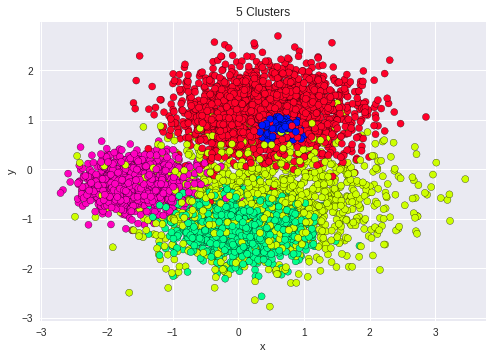

% of points in each cluster
Cluster 1: 29.31% with 1954 points
Cluster 2: 20.28% with 1352 points
Cluster 3: 20.04% with 1336 points
Cluster 4: 10.02% with 668 points
Cluster 5: 20.35% with 1357 points


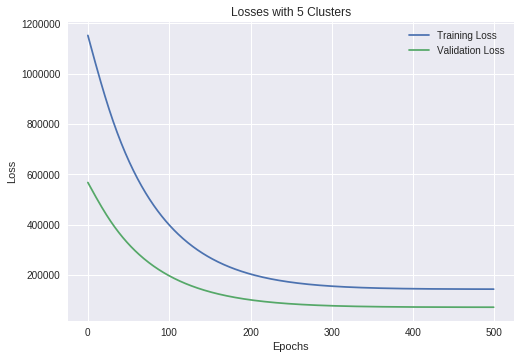

Final Loss: 143650.69
Final Validation Loss: 71860.94



Beginning training for 10 clusters...


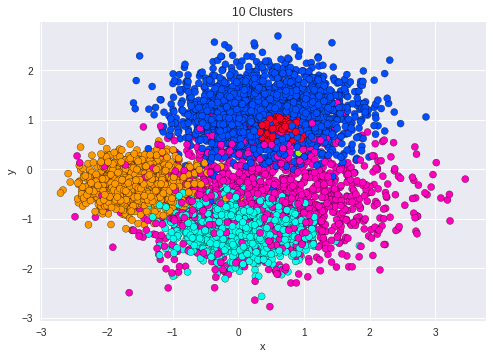

% of points in each cluster
Cluster 1: 0.0% with 0 points
Cluster 2: 0.0% with 0 points
Cluster 3: 10.02% with 668 points
Cluster 4: 20.35% with 1357 points
Cluster 5: 0.04% with 3 points
Cluster 6: 0.0% with 0 points
Cluster 7: 20.04% with 1336 points
Cluster 8: 29.31% with 1954 points
Cluster 9: 0.0% with 0 points
Cluster 10: 20.23% with 1349 points


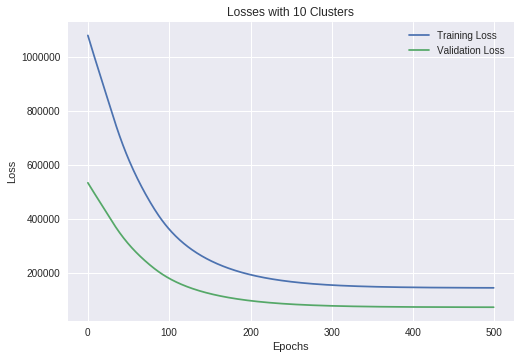

Final Loss: 143757.99
Final Validation Loss: 71954.71



Beginning training for 15 clusters...


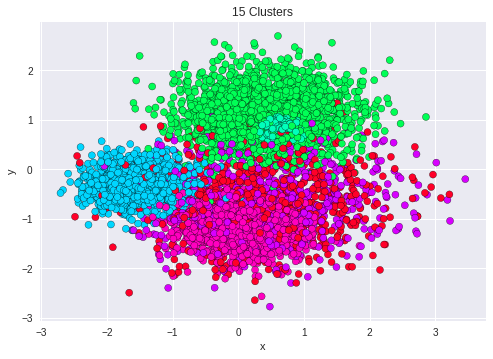

% of points in each cluster
Cluster 1: 0.0% with 0 points
Cluster 2: 11.01% with 734 points
Cluster 3: 0.0% with 0 points
Cluster 4: 0.0% with 0 points
Cluster 5: 0.0% with 0 points
Cluster 6: 0.0% with 0 points
Cluster 7: 0.01% with 1 points
Cluster 8: 29.29% with 1953 points
Cluster 9: 10.02% with 668 points
Cluster 10: 20.35% with 1357 points
Cluster 11: 0.0% with 0 points
Cluster 12: 0.0% with 0 points
Cluster 13: 0.0% with 0 points
Cluster 14: 9.27% with 618 points
Cluster 15: 20.04% with 1336 points


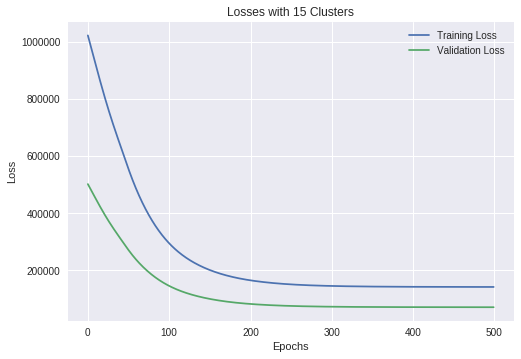

Final Loss: 141887.89
Final Validation Loss: 71066.53



Beginning training for 20 clusters...


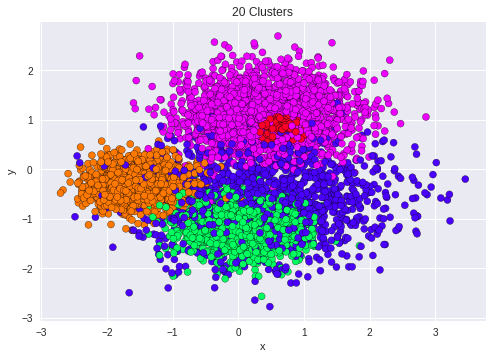

% of points in each cluster
Cluster 1: 0.0% with 0 points
Cluster 2: 0.0% with 0 points
Cluster 3: 10.02% with 668 points
Cluster 4: 0.0% with 0 points
Cluster 5: 20.35% with 1357 points
Cluster 6: 0.0% with 0 points
Cluster 7: 0.0% with 0 points
Cluster 8: 0.0% with 0 points
Cluster 9: 0.0% with 0 points
Cluster 10: 0.0% with 0 points
Cluster 11: 20.04% with 1336 points
Cluster 12: 0.0% with 0 points
Cluster 13: 0.0% with 0 points
Cluster 14: 0.0% with 0 points
Cluster 15: 0.01% with 1 points
Cluster 16: 0.0% with 0 points
Cluster 17: 20.23% with 1349 points
Cluster 18: 0.0% with 0 points
Cluster 19: 29.31% with 1954 points
Cluster 20: 0.03% with 2 points


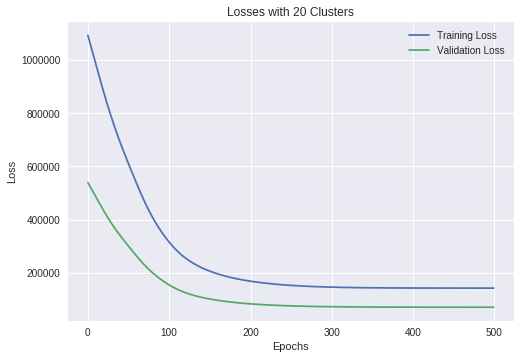

Final Loss: 143439.09
Final Validation Loss: 71802.0



Beginning training for 30 clusters...


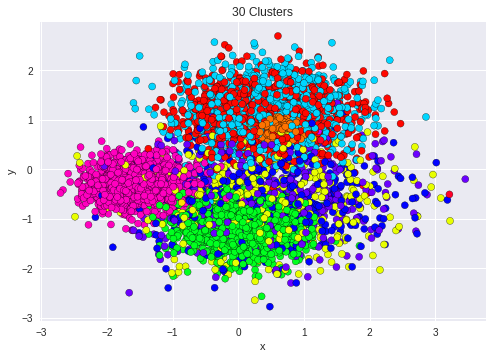

% of points in each cluster
Cluster 1: 0.0% with 0 points
Cluster 2: 0.0% with 0 points
Cluster 3: 0.09% with 6 points
Cluster 4: 14.43% with 962 points
Cluster 5: 0.0% with 0 points
Cluster 6: 10.02% with 668 points
Cluster 7: 0.0% with 0 points
Cluster 8: 0.01% with 1 points
Cluster 9: 6.54% with 436 points
Cluster 10: 0.0% with 0 points
Cluster 11: 0.01% with 1 points
Cluster 12: 0.0% with 0 points
Cluster 13: 0.0% with 0 points
Cluster 14: 20.04% with 1336 points
Cluster 15: 0.0% with 0 points
Cluster 16: 0.0% with 0 points
Cluster 17: 0.0% with 0 points
Cluster 18: 0.0% with 0 points
Cluster 19: 14.85% with 990 points
Cluster 20: 0.0% with 0 points
Cluster 21: 0.0% with 0 points
Cluster 22: 0.0% with 0 points
Cluster 23: 7.5% with 500 points
Cluster 24: 0.0% with 0 points
Cluster 25: 6.12% with 408 points
Cluster 26: 0.0% with 0 points
Cluster 27: 0.03% with 2 points
Cluster 28: 0.0% with 0 points
Cluster 29: 20.35% with 1357 points
Cluster 30: 0.0% with 0 points


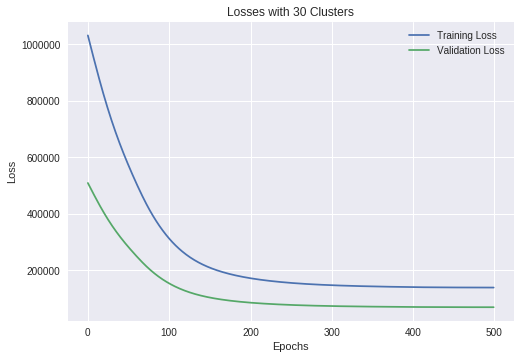

Final Loss: 139495.95
Final Validation Loss: 70019.73


In [0]:
valid_batch = int(num_pts / 3.0)
np.random.seed(45689)
rnd_idx = np.arange(num_pts)
np.random.shuffle(rnd_idx)
val_data = data[rnd_idx[:valid_batch]]
data_e = data[rnd_idx[valid_batch:]]

training_num_pts = np.shape(data_e)[0]

K=5
while(K<21):
  print("Beginning training for " + str(K) + " clusters...")
  SGD(data_e, K, training_num_pts, dim, val_data)
  print("\n\n")
  K = K+5

K = K+5  
print("Beginning training for " + str(K) + " clusters...")
SGD(data_e, K, training_num_pts, dim, val_data)


